## Import Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
plt.style.use("ggplot")
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('gene_exp.csv')
df=df.drop(['Unnamed: 0','X1','X2','bar_name'],axis=1)
df2=pd.DataFrame()
df2=df.groupby(['x','y','UMI_Count']).agg('gene_name').apply(lambda x:" ".join(list(set(x)))).reset_index()
df3=pd.read_csv('link_to_img_trial.csv')
df7=df3
df7.head()

,Unnamed: 0,x,y,Sno
0,0,4046,10350,0001img
1,1,4047,10623,0002img
2,2,4047,10896,0003img
3,3,4048,11169,0004img
4,4,4048,11442,0005img


In [3]:
df11 = pd.merge(df, df7, on=['x','y'], how='inner')
df11=df11.drop(columns=['Unnamed: 0'])
df11.head()

,UMI_Count,gene_name,x,y,Sno
0,1,SAMD11,15937,17428,2552img
1,1,NOC2L,15937,17428,2552img
2,3,HES4,15937,17428,2552img
3,22,ISG15,15937,17428,2552img
4,1,C1orf159,15937,17428,2552img


In [4]:
from numpy import load
df12=pd.pivot_table(df11, values='UMI_Count', index=['Sno'],columns=['gene_name'], aggfunc=np.sum)
df13=df12.fillna(0)
intersect_col_genes= load('intersect_col_genes.npy',allow_pickle=True)
df13=df13[intersect_col_genes]
df13.to_csv('Pivot_gene_trial.csv')

In [184]:
df14=pd.read_csv('Pivot_gene_trial.csv')
#df14.reset_index(level=0, inplace=True)
Sno=df14['Sno']
df14.drop(['Sno'],axis=1,inplace=True)
df14=np.log(df14)
df14=df14.replace([np.inf, -np.inf], np.nan)
df14=df14.fillna(0).astype('float64')
#binning= ['Low','Medium','High','Very_High']
df14=df14.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))
df14=df14.astype('str')
df14=df14.replace(['0', '1'], ['Low','High'])
df14.head()

<ipython-input-184-0df0094368eb>:5: RuntimeWarning: divide by zero encountered in log
  df14=np.log(df14)


,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,APOC1,APRT,AQP3,...,VPS28,WBP1,WDR1,WWP1,XBP1,YIPF3,YWHAE,YWHAQ,ZFAS1,ZNF706
0,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
1,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
2,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,High,Low,Low,Low,Low,Low,Low,Low,Low,Low
3,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
4,Low,Low,Low,High,Low,Low,Low,Low,Low,Low,...,High,Low,Low,Low,Low,Low,Low,Low,Low,Low


In [185]:
y=df14.iloc[:,:1].values
y

array([['Low'],
       ['Low'],
       ['Low'],
       ...,
       ['High'],
       ['High'],
       ['High']], dtype=object)

## Gene Expression Visualisation

In [7]:
df14=pd.read_csv('Pivot_gene_trial.csv')
Gene_exp=pd.merge(df7,df14,on=['Sno'],how='inner')
Gene_exp.head()

,Unnamed: 0,x,y,Sno,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,...,VPS28,WBP1,WDR1,WWP1,XBP1,YIPF3,YWHAE,YWHAQ,ZFAS1,ZNF706
0,0,4046,10350,0001img,1.0,2.0,2.0,1.0,1.0,3.0,...,4.0,2.0,1.0,1.0,10.0,0.0,3.0,1.0,2.0,2.0
1,1,4047,10623,0002img,2.0,0.0,4.0,1.0,2.0,3.0,...,0.0,1.0,0.0,2.0,9.0,0.0,0.0,2.0,2.0,2.0
2,2,4047,10896,0003img,3.0,1.0,2.0,1.0,2.0,1.0,...,5.0,3.0,1.0,3.0,12.0,1.0,7.0,1.0,0.0,3.0
3,3,4048,11169,0004img,2.0,2.0,3.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,14.0,0.0,1.0,2.0,2.0,1.0
4,4,4048,11442,0005img,0.0,0.0,2.0,5.0,0.0,4.0,...,5.0,1.0,2.0,4.0,9.0,3.0,1.0,1.0,0.0,1.0


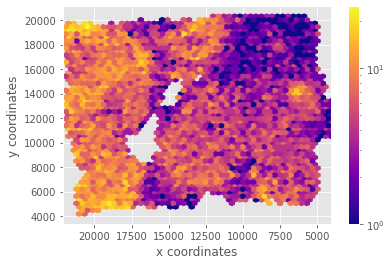

In [8]:
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from matplotlib import cm as cm
x = Gene_exp['x']
y = Gene_exp['y']
c = Gene_exp['ADAM15']
plt.hexbin(x, y, C=c, cmap=cm.plasma, gridsize=50,bins='log')
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.xlim(max(x), min(x)) 
#plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

## Intersection

In [ ]:
from numpy import savez_compressed
from numpy import asarray
from numpy import save
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
save('col_UMI.npy', col_UMI)

In [ ]:
from numpy import load
from numpy import asarray
col_Trues = load('col_Trues.npy',allow_pickle=True)
col_UMI=df13.columns.to_numpy()
col_UMI=asarray(col_UMI)
intersect_col_genes=np.intersect1d(col_UMI, col_Trues)
len(intersect_col_genes)

In [9]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df3):
    # create a set of all known tags
    labels = set()
    for i in range(len(df3)):
        # convert spaced separated tags into an array of tags
        gene_name = df3['gene_name'][i].split(' ')
        # add tags to the set of known labels
        labels.update(gene_name)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map
# create a mapping of filename to tags
def create_file_mapping(df3):
    mapping = dict()
    for i in range(len(df3)):
        name, gene_name = df3['Sno'][i], df3['gene_name'][i]
        mapping[name] = gene_name.split(' ')
    return mapping
# create a one hot encoding for one list of tags
def one_hot_encode(gene_name, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in gene_name:
        encoding[mapping[tag]] = 1
    return encoding
def load_dataset(path, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in listdir(folder):
        # load image
        photo = load_img(path + filename, target_size=(140,140))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags
        gene_name = file_mapping[filename[:-4]]
        # one hot encode tags
        target = one_hot_encode(gene_name, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    X = asarray(photos, dtype='uint8')
    return X

In [ ]:
'''X11=X.reshape([3798,58800])
X11=pd.DataFrame(data=X11)
X11.head()
X11.to_csv('Img_arr.csv')'''

## Dimensionality Reduction

In [ ]:
import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df.iloc[:,:-1].values)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

In [10]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('Gene_list_df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast2/'
X= load_dataset(folder, file_mapping, tag_mapping)
X=X.reshape([3798,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
#y=df13.iloc[:,0:5].values
#y=y.astype(int)
print(X.shape, y.shape)

(3798, 58800) (3798,)


In [69]:
from sklearn.decomposition import PCA
pca = PCA(.80)
#pca = PCA(n_components=100)
X=X/255
principalComponents = pca.fit(X)
principalC= pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalC)
#print(pca.explained_variance_ratio_)
principalDf.shape

(3798, 544)

## LGBM Classifier

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y, test_size = 0.25, random_state = 0, stratify =Y)

C:\Users\Onkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [188]:
import lightgbm as lgb
clf = lgb.LGBMClassifier( num_leaves=31, max_depth= 10,learning_rate=0.01)
clf.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(learning_rate=0.01, max_depth=10)

In [189]:
y_pred=clf.predict(X_test)
#y_pred = [np.argmax(line) for line in y_pred]

In [190]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
f1score = f1_score(y_test, y_pred,average='micro')
print('LightGBM Model f1 score: {0:0.4f}'.format(f1score))
recall = recall_score(y_test, y_pred,average='micro')
print('LightGBM Model recall score: {0:0.4f}'.format(recall))
precision = precision_score(y_test, y_pred,average='micro')
print('LightGBM Model precision score: {0:0.4f}'.format(precision))
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

Confusion matrix

 [[388  86]
 [143 333]]
LightGBM Model f1 score: 0.7589
LightGBM Model recall score: 0.7589
LightGBM Model precision score: 0.7589
LightGBM Model accuracy score: 0.7589


## SVM

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## TPOT AutoML

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(principalDf, Y)

In [ ]:
'''df=pd.DataFrame(data=X)
df['UMI']=y
df.head()
'''
correlation_matrix = principalDf.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
principalDf.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
principalDf['UMI']=y
X = principalDf.iloc[:, :-1].values
y = principalDf.iloc[:, 585].values
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=1)
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

## ANN

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) #(3407,140,140,3) --> reshape --> (3407,58800), #Umap->DR #CNN/CapsNet
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [193]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.constraints import maxnorm

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)
trainX, testX, trainY, testY = train_test_split(principalDf, dummy_y, test_size=0.25, random_state=1)
#sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
model = Sequential()
model.add(Dense(600, input_dim=544, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(500, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(400, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(300, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(200, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(100, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.35))
model.add(Dense(2,  activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics= ['AUC'])
model.fit(trainX, trainY,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(testX, testY))

Epoch 1/10
45/45 [==============================] - 1s 32ms/step - loss: 0.6731 - auc: 0.7280 - val_loss: 0.5772 - val_auc: 0.8200
Epoch 2/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5805 - auc: 0.7830 - val_loss: 0.5410 - val_auc: 0.8207
Epoch 3/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5433 - auc: 0.8065 - val_loss: 0.5361 - val_auc: 0.8208
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.5390 - auc: 0.8080 - val_loss: 0.5324 - val_auc: 0.8212
Epoch 5/10
45/45 [==============================] - 1s 22ms/step - loss: 0.5099 - auc: 0.8297 - val_loss: 0.5466 - val_auc: 0.8245
Epoch 6/10
45/45 [==============================] - 1s 21ms/step - loss: 0.4968 - auc: 0.8383 - val_loss: 0.5505 - val_auc: 0.8259
Epoch 7/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5011 - auc: 0.8372 - val_loss: 0.5438 - val_auc: 0.8256
Epoch 8/10
45/45 [==============================] - 1s 21ms/step - loss: 0.4903 - a

In [175]:
score=model.evaluate(testX,testY)
print(score)
y_pred = model.predict(testX)

30/30 [==============================] - 0s 3ms/step - loss: 0.8635 - auc: 0.7831
[0.8635242581367493, 0.7830564975738525]


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, preds), 2)) 
print("R2 score =", round(sm.r2_score(testY, preds), 2))

In [ ]:
import seaborn as sns
residuals = testY - preds
sns.distplot(residuals)

In [ ]:
t.test(testY,preds)
var.test(testY,preds)

## Linear Regression

In [ ]:
from os import listdir
from numpy import zeros
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df5=pd.read_csv('df5.csv')
df5=df5.drop(columns=['Unnamed: 0'])
mapping_csv = df5
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
folder = 'C:/Users/Onkar/UntitledFolder/Trainimg_breast/'
X= load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
X=X.reshape([3407,58800]) 
#X=X/255
y=df13.iloc[:,0:1].values
y=y.astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

#X = df.iloc[:, :-1].values
#y = df.iloc[:, 58800].values
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
sc = StandardScaler()
#trainX = sc.fit_transform(trainX)
#testX = sc.transform(testX)
#trainY = sc.fit_transform(trainY)
#testY = sc.fit_transform(testY)
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(trainX)
poly_reg.fit(X_poly, trainY)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, y)

#regressor = SVR(kernel = 'poly')
#regressor.fit(trainX, trainY)

y_pred = regressor.predict(testX)

In [ ]:
'''
regressor = LinearRegression()
regressor.fit(trainX, trainY)
y_pred = regressor.predict(testX)
y_pred''' 

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_preds = y_pred
plt.scatter(x=list(range(0, 682)), y=testY, color ='blue')
plt.scatter(x=list(range(0, 682)), y=y_preds, color ='red')

In [ ]:
import seaborn as sns
residuals = testY - y_pred
sns.distplot(residuals)

## LGBM Regression

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict


hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [ ]:
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)

trainY=trainY.reshape([2725,])
trainY=trainY.ravel()
testY=testY.reshape([682,])
testY=testY.ravel()

gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)

In [ ]:
import seaborn as sns
#preds = model.predict(testX)
'''y_preds = y_pred'''
#plt.scatter(x=trainX[2], y=trainY, color ='blue')
#plt.scatter(x=testX[2], y=y_pred, color ='red')
sns.lineplot(data=testY)
sns.lineplot(data=y_pred)

In [ ]:
plot_prediction(testY, y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

## Multivariate Regression

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
import lightgbm as lgb

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

model = lgb.LGBMRegressor(**hyper_params)
wrapper = MultiOutputRegressor(model)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(wrapper, principalDf, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
#principalDf.to_csv('X.csv')
#np.savetxt("y.csv", y, delimiter=",")
#y
#y=pd.DataFrame(data=y)
#y.to_csv('y.csv')
import pandas as pd
from sklearn.model_selection import train_test_split

X=pd.read_csv('X.csv')
y=pd.read_csv('y.csv')
y=y.iloc[:,0:5].values
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=1)

## TABNET-Regressor

In [ ]:
import pandas as pd
import numpy  as np
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(principalDf, y, test_size=0.20, random_state=1)
X      = trainX.to_numpy()
#y      = trainY.to_numpy()
X_test = testX.to_numpy()
kf = KFold(n_splits=2, random_state=42, shuffle=True)
predictions_array =[]
CV_score_array    =[]
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    regressor = TabNetRegressor(n_d=512,n_a=512,scheduler_fn=torch.optim.lr_scheduler.MultiStepLR,scheduler_params = {"milestones": [150,250,300,350,400,450],'gamma':0.2},verbose=1,seed=42)
    regressor.fit(X_train=X_train, y_train=y_train,
              eval_set=[(X_valid, y_valid)],
              patience=200, max_epochs=20,
              eval_metric=['rmse'])
    CV_score_array.append(regressor.best_cost)
    predictions_array.append(regressor.predict(X_test))
predictions = np.mean(predictions_array,axis=0)

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=predictions_array[1])

In [ ]:
plot_prediction(testY, predictions_array[1])

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, predictions_array[1]), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, predictions_array[1]), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, predictions_array[1]), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, predictions_array[1]), 2)) 
print("R2 score =", round(sm.r2_score(testY, predictions_array[1]), 2))

## Conv 1-D Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_data=principalDf.iloc[0:3000,:].values
test_data=principalDf.iloc[3000:3407,:].values

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
def build_model():
    model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)], name="MLP_model")
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model
model = build_model()
model.summary()

In [ ]:
train_labels = y[0:3000]
EPOCHS = 500
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mse']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mse']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mse'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")
plot_history(history)

In [ ]:
test_labels = y[3000:3407]
[loss, mae] = model.evaluate(test_data, test_labels, verbose=1)
print("Testing set Mean Sqr Error: ${:7.2f}".format(mae))

In [ ]:
test_predictions = model.predict(test_data).flatten()
test_predictions[test_predictions<0] = 0
plot_prediction(test_labels, test_predictions)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=test_predictions)

In [ ]:
import sklearn.metrics as sm
test_predictions[test_predictions<0] = 0
print("Mean absolute error =", round(sm.mean_absolute_error(test_labels, test_predictions), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_labels, test_predictions), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_labels, test_predictions), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_labels, test_predictions), 2)) 
print("R2 score =", round(sm.r2_score(test_labels, test_predictions), 2))

## LOWESS/LOESS Rgression (Non-Parametric)

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import plotly.graph_objects as go 
import plotly.express as px 
import statsmodels.api as sm 
from scipy.interpolate import interp1d 

In [ ]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

model1 = LinearRegression()
LR = model1.fit(trainX, trainY)

x_range = np.linspace(X.min(), X.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))


trainY=np.reshape(trainY, (2725))
trainX=np.reshape(trainX, (2725))

In [ ]:
trainX["PCA"] = trainX[0]
trainX.drop([0],axis=1,inplace=True)
trainX=trainX['PCA'].values

In [ ]:
y_hat1 = lowess(trainY, trainX) 
y_hat2 = lowess(trainY, trainX, frac=1/5)

In [ ]:
fig = px.scatter(df, x=trainX, y=trainY)
x_range = np.linspace(trainX.min(), trainX.max(), 20) 
y_range = model1.predict(x_range.reshape(-1, 1))

fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=y_hat1[:,0], y=y_hat1[:,1], name='LOWESS, frac=2/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/5', line=dict(color='orange')))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Scatter Plot", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
f_linear = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='linear', fill_value='extrapolate') 
f_nearest = interp1d(y_hat1[:,0], y=y_hat1[:,1], bounds_error=False, kind='nearest', fill_value='extrapolate') 

testX=np.reshape(testX, (682))

ynew_linear = f_linear(testX)
ynew_nearest = f_nearest(testX)

print(ynew_linear)
print(ynew_nearest)

In [ ]:
import seaborn as sns
sns.lineplot(data=test_labels)
sns.lineplot(data=ynew_nearest)

## Image to Signal

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(20,10))
sns.lineplot(ax=axes[0, 0], data=X[])
sns.lineplot(ax=axes[0, 1], data=X[9])
sns.lineplot(ax=axes[0, 2], data=X[10])
sns.lineplot(ax=axes[1, 0], data=X[3])
sns.lineplot(ax=axes[1, 1], data=X[4])
sns.lineplot(ax=axes[1, 2], data=X[5])

## LGBM -R PCA =1 

In [ ]:
trainX, testX, trainY, testY = train_test_split(principalDf1, y, test_size=0.20, random_state=1)

trainY=trainY.reshape([2725,])
trainY=trainY.ravel()
testY=testY.reshape([682,])
testY=testY.ravel()

gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(trainX, trainY,
        eval_set=[(testX, testY)],
        eval_metric='l1',
        early_stopping_rounds=1000)
y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration_)

In [ ]:
import seaborn as sns
sns.lineplot(data=testY)
sns.lineplot(data=y_pred)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testY, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(testY, y_pred), 2))

In [ ]:
y_test